In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
import os

In [4]:
def get_results_from_json(json_file, metric):
	with open(json_file, 'r') as f:
		data = json.load(f)

		scores = {}
		for category, category_data in data["results"].items():

		# Extract the Brier score from the category data
			score = category_data.get(f"{metric},none")
			if score is not None:
				scores[category] = score 
	return scores

In [23]:
#list order: [acc, brier_score, rmsce]
t5_v1_1_small_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-small/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-small/results_2024-05-30T22-40-24.946764.json"
t5_v1_1_small_mmlu = [get_results_from_json(t5_v1_1_small_mmlu_path , "acc"), get_results_from_json(t5_v1_1_small_mmlu_path , "brier_score"), get_results_from_json(t5_v1_1_small_mmlu_path , "rmsce")]
t5_v1_1_base_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-base/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-base/results_2024-05-31T09-58-32.870997.json"
t5_v1_1_base_mmlu = [get_results_from_json(t5_v1_1_base_mmlu_path , "acc"), get_results_from_json(t5_v1_1_base_mmlu_path , "brier_score"), get_results_from_json(t5_v1_1_base_mmlu_path , "rmsce")]
t5_v1_1_large_mmlu_path = "safety_vs_capabilities/lm_evals/t5-v1_1-large/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-large/results_2024-05-31T04-51-55.118008.json"
t5_v1_1_large_mmlu = [get_results_from_json(t5_v1_1_large_mmlu_path , "acc"), get_results_from_json(t5_v1_1_large_mmlu_path , "brier_score"), get_results_from_json(t5_v1_1_large_mmlu_path , "rmsce")]
t5_v1_1_xl_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-xl/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-xl/results_2024-05-31T05-44-55.178948.json"
t5_v1_1_xl_mmlu = [get_results_from_json(t5_v1_1_xl_mmlu_path , "acc"), get_results_from_json(t5_v1_1_xl_mmlu_path , "brier_score"), get_results_from_json(t5_v1_1_xl_mmlu_path , "rmsce")]
t5_v1_1_xxl_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-xxl/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-xxl/results_2024-05-31T15-03-47.476506.json"
t5_v1_1_xxl_mmlu = [get_results_from_json(t5_v1_1_xxl_mmlu_path , "acc"), get_results_from_json(t5_v1_1_xxl_mmlu_path , "brier_score"), get_results_from_json(t5_v1_1_xxl_mmlu_path , "rmsce")]

flan_t5_small_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-small/result-mmlu-all.jsonl/__data__public_models__huggingface__google__flan-t5-small/results_2024-05-31T23-24-56.261682.json"
flan_t5_small_mmlu = [get_results_from_json(flan_t5_small_mmlu_path, "acc"), get_results_from_json(flan_t5_small_mmlu_path, "brier_score"), get_results_from_json(flan_t5_small_mmlu_path, "rmsce")]
flan_t5_base_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-base/result-mmlu-all.jsonl/__data__public_models__huggingface__google__flan-t5-base/results_2024-05-31T23-31-52.293798.json"
flan_t5_base_mmlu = [get_results_from_json(flan_t5_base_mmlu_path, "acc"), get_results_from_json(flan_t5_base_mmlu_path, "brier_score"), get_results_from_json(flan_t5_base_mmlu_path, "rmsce")]
flan_t5_large_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-large/result-mmlu-all.jsonl/__data__public_models__huggingface__google__flan-t5-large/results_2024-06-01T22-52-18.535440.json"
flan_t5_large_mmlu = [get_results_from_json(flan_t5_large_mmlu_path, "acc"), get_results_from_json(flan_t5_large_mmlu_path, "brier_score"), get_results_from_json(flan_t5_large_mmlu_path, "rmsce")]
flan_t5_xl_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-xl/result-mmlu-all.jsonl/__data__public_models__huggingface__google__flan-t5-xl/results_2024-06-01T20-28-57.107823.json"
flan_t5_xl_mmlu = [get_results_from_json(flan_t5_xl_mmlu_path, "acc"), get_results_from_json(flan_t5_xl_mmlu_path, "brier_score"), get_results_from_json(flan_t5_xl_mmlu_path, "rmsce")]
flan_t5_xxl_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-xxl/result-mmlu-all.jsonl/__data__public_models__huggingface__google__flan-t5-xxl/results_2024-06-02T03-16-35.064262.json"
flan_t5_xxl_mmlu = [get_results_from_json(flan_t5_xxl_mmlu_path, "acc"), get_results_from_json(flan_t5_xxl_mmlu_path, "brier_score"), get_results_from_json(flan_t5_xxl_mmlu_path, "rmsce")]

gemma_2b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-2b/result-mmlu-all.jsonl"
gemma_2b_mmlu = [get_results_from_json(gemma_2b_mmlu_path, "acc"), get_results_from_json(gemma_2b_mmlu_path, "brier_score"), get_results_from_json(gemma_2b_mmlu_path, "rmsce")]
# gemma_1_1_2b_it_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-1.1-2b-it/result-mmlu-all.jsonl/__data__public_models__huggingface__google__gemma-2b/results_2024-05-30T22-52-02.925599.json"
# gemma_1_1_2b_it_mmlu = [get_results_from_json(gemma_1_1_2b_it_mmlu_path, "acc"), get_results_from_json(gemma_1_1_2b_it_mmlu_path, "brier_score"), get_results_from_json(gemma_1_1_2b_it_mmlu_path, "rmsce")]
gemma_7b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-7b/result-mmlu-all.jsonl"
gemma_7b_mmlu = [get_results_from_json(gemma_7b_mmlu_path, "acc"), get_results_from_json(gemma_7b_mmlu_path, "brier_score"), get_results_from_json(gemma_7b_mmlu_path, "rmsce")]
# gemma_1_1_7b_it_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-1.1-7b-it/result-mmlu-all.jsonl/__data__public_models__huggingface__google__gemma-7b/results_2024-05-30T23-03-14.099230.json"
# gemma_1_1_7b_it_mmlu = [get_results_from_json(gemma_1_1_7b_it_mmlu_path, "acc"), get_results_from_json(gemma_1_1_7b_it_mmlu_path, "brier_score"), get_results_from_json(gemma_1_1_7b_it_mmlu_path, "rmsce")]

gpt_2_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/gpt-2/result-mmlu-all.jsonl/__data__public_models__huggingface__openai-community__gpt2/results_2024-05-30T22-49-22.215985.json"
gpt_2_mmlu = [get_results_from_json(gpt_2_mmlu_path, "acc"), get_results_from_json(gpt_2_mmlu_path, "brier_score"), get_results_from_json(gpt_2_mmlu_path, "rmsce")]

pythia_14m_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-14m/result-mmlu-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-14m/results_2024-05-30T20-23-25.995550.json"
pythia_14m_mmlu = [get_results_from_json(pythia_14m_mmlu_path, "acc"), get_results_from_json(pythia_14m_mmlu_path, "brier_score"), get_results_from_json(pythia_14m_mmlu_path, "rmsce")]
pythia_70m_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-70m/result-mmlu-all.jsonl"
pythia_70m_mmlu = [get_results_from_json(pythia_70m_mmlu_path, "acc"), get_results_from_json(pythia_70m_mmlu_path, "brier_score"), get_results_from_json(pythia_70m_mmlu_path, "rmsce")]
pythia_160m_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-160m/result-mmlu-all.jsonl"
pythia_160m_mmlu = [get_results_from_json(pythia_160m_mmlu_path, "acc"), get_results_from_json(pythia_160m_mmlu_path, "brier_score"), get_results_from_json(pythia_160m_mmlu_path, "rmsce")]
pythia_410m_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-410m/result-mmlu-all.jsonl"
pythia_410m_mmlu = [get_results_from_json(pythia_410m_mmlu_path, "acc"), get_results_from_json(pythia_410m_mmlu_path, "brier_score"), get_results_from_json(pythia_410m_mmlu_path, "rmsce")]
pythia_1b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-1b/result-mmlu-all.jsonl"
pythia_1b_mmlu = [get_results_from_json(pythia_1b_mmlu_path, "acc"), get_results_from_json(pythia_1b_mmlu_path, "brier_score"), get_results_from_json(pythia_1b_mmlu_path, "rmsce")]
pythia_1_4b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-1.4b/result-mmlu-all.jsonl"
pythia_1_4b_mmlu = [get_results_from_json(pythia_1_4b_mmlu_path, "acc"), get_results_from_json(pythia_1_4b_mmlu_path, "brier_score"), get_results_from_json(pythia_1_4b_mmlu_path, "rmsce")]
pythia_2_8b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-2.8b/result-mmlu-all.jsonl"
pythia_2_8b_mmlu = [get_results_from_json(pythia_2_8b_mmlu_path, "acc"), get_results_from_json(pythia_2_8b_mmlu_path, "brier_score"), get_results_from_json(pythia_2_8b_mmlu_path, "rmsce")]
pythia_6_9b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-6.9b/result-mmlu-all.jsonl"
pythia_6_9b_mmlu = [get_results_from_json(pythia_6_9b_mmlu_path, "acc"), get_results_from_json(pythia_6_9b_mmlu_path, "brier_score"), get_results_from_json(pythia_6_9b_mmlu_path, "rmsce")]
pythia_12b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-12b/result-mmlu-all.jsonl"
pythia_12b_mmlu = [get_results_from_json(pythia_12b_mmlu_path, "acc"), get_results_from_json(pythia_12b_mmlu_path, "brier_score"), get_results_from_json(pythia_12b_mmlu_path, "rmsce")]

mistral_7b_v01_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Mistral-7B-v0.1/result-mmlu-all.jsonl/__data__public_models__huggingface__mistralai__Mistral-7B-v0.1/results_2024-05-30T21-55-31.393603.json"
mistral_7b_v01_mmlu = [get_results_from_json(mistral_7b_v01_mmlu_path, "acc"), get_results_from_json(mistral_7b_v01_mmlu_path, "brier_score"), get_results_from_json(mistral_7b_v01_mmlu_path, "rmsce")]
# mistral_7b_instruct_v02_mmlu_path = ""
# mistral_7b_instruct_v02_mmlu = [get_results_from_json(mistral_7b_instruct_v02_mmlu_path, "acc"), get_results_from_json(mistral_7b_instruct_v02_mmlu_path, "brier_score"), get_results_from_json(mistral_7b_instruct_v02_mmlu_path, "rmsce")]
mixtral_8x7b_v01_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Mixtral-8x7B-v0.1/result-mmlu-all.jsonl/__data__public_models__huggingface__mistralai__Mixtral-8x7B-v0.1/results_2024-05-31T19-36-18.660728.json"
mixtral_8x7b_v01_mmlu = [get_results_from_json(mixtral_8x7b_v01_mmlu_path, "acc"), get_results_from_json(mixtral_8x7b_v01_mmlu_path, "brier_score"), get_results_from_json(mixtral_8x7b_v01_mmlu_path, "rmsce")]
# mixtral_8x7b_instruct_v01_mmlu_path = ""
# mixtral_8x7b_instruct_v01_mmlu = [get_results_from_json(mixtral_8x7b_instruct_v01_mmlu_path, "acc"), get_results_from_json(mixtral_8x7b_instruct_v01_mmlu_path, "brier_score"), get_results_from_json(mixtral_8x7b_instruct_v01_mmlu_path, "rmsce")]
mixtral_8x22b_v01_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Mixtral-8x22B-v0.1/result-mmlu-all.jsonl/__data__public_models__huggingface__mistralai__Mixtral-8x22B-v0.1/results_2024-06-01T04-56-00.085717.json"
mixtral_8x22b_v01_mmlu = [get_results_from_json(mixtral_8x22b_v01_mmlu_path, "acc"), get_results_from_json(mixtral_8x22b_v01_mmlu_path, "brier_score"), get_results_from_json(mixtral_8x22b_v01_mmlu_path, "rmsce")]
# mixtral_8x22b_instruct_v01_mmlu_path = ""
# mixtral_8x22b_instruct_v01_mmlu = [get_results_from_json(mixtral_8x22b_instruct_v01_mmlu_path, "acc"), get_results_from_json(mixtral_8x22b_instruct_v01_mmlu_path, "brier_score"), get_results_from_json(mixtral_8x22b_instruct_v01_mmlu_path, "rmsce")]

llama_2_7b_hf_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Llama-2-7b-hf/result-mmlu-all.jsonl"
llama_2_7b_hf_mmlu = [get_results_from_json(llama_2_7b_hf_mmlu_path, "acc"), get_results_from_json(llama_2_7b_hf_mmlu_path, "brier_score"), get_results_from_json(llama_2_7b_hf_mmlu_path, "rmsce")]
# llama_2_7b_chat_hf_mmlu_path = ""
# llama_2_7b_chat_hf_mmlu = [get_results_from_json(llama_2_7b_chat_hf_mmlu_path, "acc"), get_results_from_json(llama_2_7b_chat_hf_mmlu_path, "brier_score"), get_results_from_json(llama_2_7b_chat_hf_mmlu_path, "rmsce")]
llama_2_13b_hf_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Llama-2-13b-hf/result-mmlu-all.jsonl/__data__public_models__huggingface__meta-llama__Llama-2-13b-hf/results_2024-05-30T21-30-53.042523.json"
llama_2_13b_hf_mmlu = [get_results_from_json(llama_2_13b_hf_mmlu_path, "acc"), get_results_from_json(llama_2_13b_hf_mmlu_path, "brier_score"), get_results_from_json(llama_2_13b_hf_mmlu_path, "rmsce")]
# llama_2_13b_chat_hf_mmlu_path = ""
# llama_2_13b_chat_hf_mmlu = [get_results_from_json(llama_2_13b_chat_hf_mmlu_path, "acc"), get_results_from_json(llama_2_13b_chat_hf_mmlu_path, "brier_score"), get_results_from_json(llama_2_13b_chat_hf_mmlu_path, "rmsce")]

meta_llama_3_8B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Meta-Llama-3-8B/result-mmlu-all.jsonl"
meta_llama_3_8B_mmlu = [get_results_from_json(meta_llama_3_8B_mmlu_path, "acc"), get_results_from_json(meta_llama_3_8B_mmlu_path, "brier_score"), get_results_from_json(meta_llama_3_8B_mmlu_path, "rmsce")]
# meta_llama_3_8B_instruct_mmlu_path = ""
# meta_llama_3_8B_instruct_mmlu = [get_results_from_json(meta_llama_3_8B_instruct_mmlu_path, "acc"), get_results_from_json(meta_llama_3_8B_instruct_mmlu_path, "brier_score"), get_results_from_json(meta_llama_3_8B_instruct_mmlu_path, "rmsce")]
meta_llama_3_70B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Meta-Llama-3-70B/result-mmlu-all.jsonl/__data__public_models__huggingface__meta-llama__Meta-Llama-3-70B/results_2024-06-01T20-59-04.559411.json"
meta_llama_3_70B_mmlu = [get_results_from_json(meta_llama_3_70B_mmlu_path, "acc"), get_results_from_json(meta_llama_3_70B_mmlu_path, "brier_score"), get_results_from_json(meta_llama_3_70B_mmlu_path, "rmsce")]
# meta_llama_3_70B_instruct_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Meta-Llama-3-8B-Instruct/result-mmlu-all.jsonl/__data__public_models__huggingface__meta-llama__Meta-Llama-3-8B/results_2024-05-30T23-01-26.924420.json"
# meta_llama_3_70B_instruct_mmlu = [get_results_from_json(meta_llama_3_70B_instruct_mmlu_path, "acc"), get_results_from_json(meta_llama_3_70B_instruct_mmlu_path, "brier_score"), get_results_from_json(meta_llama_3_70B_instruct_mmlu_path, "rmsce")]

qwen1_5_0_5B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-0.5B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-0.5B/results_2024-05-30T22-50-24.959145.json"
qwen1_5_0_5B_mmlu = [get_results_from_json(qwen1_5_0_5B_mmlu_path, "acc"), get_results_from_json(qwen1_5_0_5B_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_0_5B_mmlu_path, "rmsce")]
# qwen1_5_0_5B_chat_mmlu_path = ""
# qwen1_5_0_5B_chat_mmlu = [get_results_from_json(qwen1_5_0_5B_chat_mmlu_path, "acc"), get_results_from_json(qwen1_5_0_5B_chat_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_0_5B_chat_mmlu_path, "rmsce")]
qwen1_5_1_8B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-1.8B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-1.8B/results_2024-05-30T22-51-21.639045.json"
qwen1_5_1_8B_mmlu = [get_results_from_json(qwen1_5_1_8B_mmlu_path, "acc"), get_results_from_json(qwen1_5_1_8B_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_1_8B_mmlu_path, "rmsce")]
# qwen1_5_1_8B_chat_mmlu_path = "safety_vs_capabilities/lm_evals/Qwen1.5-1.8B-Chat/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-1.8B/results_2024-05-30T22-51-21.639045.json"
# qwen1_5_1_8B_chat_mmlu = [get_results_from_json(qwen1_5_1_8B_chat_mmlu_path, "acc"), get_results_from_json(qwen1_5_1_8B_chat_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_1_8B_chat_mmlu_path, "rmsce")]
qwen1_5_4B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-4B/result-mmlu-all.jsonl"
qwen1_5_4B_mmlu = [get_results_from_json(qwen1_5_4B_mmlu_path, "acc"), get_results_from_json(qwen1_5_4B_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_4B_mmlu_path, "rmsce")]
# qwen1_5_4B_chat_mmlu_path = ""
# qwen1_5_4B_chat_mmlu = [get_results_from_json(qwen1_5_4B_chat_mmlu_path, "acc"), get_results_from_json(qwen1_5_4B_chat_mmlu_path, "brier_score", get_results_from_json(qwen1_5_4B_chat_mmlu_path, "rmsce"))]
qwen1_5_7B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-7B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-7B/results_2024-05-31T04-52-33.487087.json"
qwen1_5_7B_mmlu = [get_results_from_json(qwen1_5_7B_mmlu_path, "acc"), get_results_from_json(qwen1_5_7B_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_7B_mmlu_path, "rmsce")]
# qwen1_5_7B_chat_mmlu_path = ""
# qwen1_5_7B_chat_mmlu = [get_results_from_json(qwen1_5_7B_chat_mmlu_path, "acc"), get_results_from_json(qwen1_5_7B_chat_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_7B_chat_mmlu_path, "rmsce")]
qwen1_5_14B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-14B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-14B/results_2024-05-31T05-18-47.418803.json"
qwen1_5_14B_mmlu = [get_results_from_json(qwen1_5_14B_mmlu_path, "acc"), get_results_from_json(qwen1_5_14B_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_14B_mmlu_path, "rmsce")]
# qwen1_5_14B_chat_mmlu_path = ""
# qwen1_5_14B_chat_mmlu = [get_results_from_json(qwen1_5_14B_chat_mmlu_path, "acc"), get_results_from_json(qwen1_5_14B_chat_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_14B_chat_mmlu_path, "rmsce")]
qwen1_5_32B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-32B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-32B/results_2024-05-31T05-51-22.740368.json"
qwen1_5_32B_mmlu = [get_results_from_json(qwen1_5_32B_mmlu_path, "acc"), get_results_from_json(qwen1_5_32B_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_32B_mmlu_path, "rmsce")]
# qwen1_5_32B_chat_mmlu_path = ""
# qwen1_5_32B_chat_mmlu = [get_results_from_json(qwen1_5_32B_chat_mmlu_path, "acc"), get_results_from_json(qwen1_5_32B_chat_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_32B_chat_mmlu_path, "rmsce")]
qwen1_5_72B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-72B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-72B/results_2024-06-01T06-18-51.681873.json"
qwen1_5_72B_mmlu = [get_results_from_json(qwen1_5_72B_mmlu_path, "acc"), get_results_from_json(qwen1_5_72B_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_72B_mmlu_path, "rmsce")]
# qwen1_5_72B_chat_mmlu_path = ""
# qwen1_5_72B_chat_mmlu = [get_results_from_json(qwen1_5_72B_chat_mmlu_path, "acc"), get_results_from_json(qwen1_5_72B_chat_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_72B_chat_mmlu_path, "rmsce")]
qwen1_5_110B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-110B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-110B/results_2024-06-01T21-57-07.286813.json"
qwen1_5_110B_mmlu = [get_results_from_json(qwen1_5_110B_mmlu_path, "acc"), get_results_from_json(qwen1_5_110B_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_110B_mmlu_path, "rmsce")]
# qwen1_5_110B_chat_mmlu_path = ""
# qwen1_5_110B_chat_mmlu = [get_results_from_json(qwen1_5_110B_chat_mmlu_path, "acc"), get_results_from_json(qwen1_5_110B_chat_mmlu_path, "brier_score"), get_results_from_json(qwen1_5_110B_chat_mmlu_path, "rmsce")]

yi_6B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Yi-6B/result-mmlu-all.jsonl/__data__public_models__huggingface__01-ai__Yi-6B/results_2024-05-30T22-16-37.475327.json"
yi_6B_mmlu = [get_results_from_json(yi_6B_mmlu_path, "acc"), get_results_from_json(yi_6B_mmlu_path, "brier_score"), get_results_from_json(yi_6B_mmlu_path, "rmsce")]
# yi_6B_chat_mmlu_path = ""
# yi_6B_chat_mmlu = [get_results_from_json(yi_6B_chat_mmlu_path, "acc"), get_results_from_json(yi_6B_chat_mmlu_path, "brier_score"), get_results_from_json(yi_6B_chat_mmlu_path, "rmsce")]
yi_9B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Yi-9B/result-mmlu-all.jsonl/__data__public_models__huggingface__01-ai__Yi-9B/results_2024-05-31T04-48-22.825093.json"
yi_9B_mmlu = [get_results_from_json(yi_9B_mmlu_path, "acc"), get_results_from_json(yi_9B_mmlu_path, "brier_score"), get_results_from_json(yi_9B_mmlu_path, "rmsce")]
yi_34B_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/Yi-34B/result-mmlu-all.jsonl/__data__public_models__huggingface__01-ai__Yi-34B/results_2024-05-31T05-37-19.293942.json"
yi_34B_mmlu = [get_results_from_json(yi_34B_mmlu_path, "acc"), get_results_from_json(yi_34B_mmlu_path, "brier_score"), get_results_from_json(yi_34B_mmlu_path, "rmsce")]
# yi_34B_chat_mmlu_path = ""
# yi_34B_chat_mmlu = [get_results_from_json(yi_34B_chat_mmlu_path, "acc"), get_results_from_json(yi_34B_chat_mmlu_path, "brier_score"), get_results_from_json(yi_34B_chat_mmlu_path, "rmsce")]

deepseek_7b_base_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/deepseek-llm-7b-base/result-mmlu-all.jsonl"
deepseek_7b_base_mmlu = [get_results_from_json(deepseek_7b_base_mmlu_path, "acc"), get_results_from_json(deepseek_7b_base_mmlu_path, "brier_score"), get_results_from_json(deepseek_7b_base_mmlu_path, "rmsce")]
# deepseek_7b_chat_mmlu_path = ""
# deepseek_7b_chat_mmlu = [get_results_from_json(deepseek_7b_chat_mmlu_path, "acc"), get_results_from_json(deepseek_7b_chat_mmlu_path, "brier_score"), get_results_from_json(deepseek_7b_chat_mmlu_path, "rmsce")]
deepseek_67b_base_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/deepseek-llm-67b-base/result-mmlu-all.jsonl/__data__public_models__huggingface__deepseek-ai__deepseek-llm-67b-base/results_2024-06-01T07-09-45.238727.json"
deepseek_67b_base_mmlu = [get_results_from_json(deepseek_67b_base_mmlu_path, "acc"), get_results_from_json(deepseek_67b_base_mmlu_path, "brier_score"), get_results_from_json(deepseek_67b_base_mmlu_path, "rmsce")]
# deepseek_67b_chat_mmlu_path = ""
# deepseek_67b_chat_mmlu = [get_results_from_json(deepseek_67b_chat_mmlu_path, "acc"), get_results_from_json(deepseek_67b_chat_mmlu_path, "brier_score"), get_results_from_json(deepseek_67b_chat_mmlu_path, "rmsce")]

falcon_7b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-7b/result-mmlu-all.jsonl"
falcon_7b_mmlu = [get_results_from_json(falcon_7b_mmlu_path, "acc"), get_results_from_json(falcon_7b_mmlu_path, "brier_score"), get_results_from_json(falcon_7b_mmlu_path, "rmsce")]
# falcon_7b_instruct_mmlu_path = ""
# falcon_7b_instruct_mmlu = [get_results_from_json(falcon_7b_instruct_mmlu_path, "acc"), get_results_from_json(falcon_7b_instruct_mmlu_path, "brier_score"), get_results_from_json(falcon_7b_instruct_mmlu_path, "rmsce")]
falcon_40b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-40b/result-mmlu-all.jsonl/__data__public_models__huggingface__tiiuae__falcon-40b/results_2024-05-31T15-17-57.622781.json"
falcon_40b_mmlu = [get_results_from_json(falcon_40b_mmlu_path, "acc"), get_results_from_json(falcon_40b_mmlu_path, "brier_score"), get_results_from_json(falcon_40b_mmlu_path, "rmsce")]
# falcon_40b_instruct_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-7b-instruct/result-mmlu-all.jsonl/__data__public_models__huggingface__tiiuae__falcon-7b/results_2024-05-30T23-08-29.466835.json"
# falcon_40b_instruct_mmlu = [get_results_from_json(falcon_40b_instruct_mmlu_path, "acc"), get_results_from_json(falcon_40b_instruct_mmlu_path, "brier_score"), get_results_from_json(falcon_40b_instruct_mmlu_path, "rmsce")]
# falcon_180b_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-7b/result-mmlu-all.jsonl/__data__public_models__huggingface__tiiuae__falcon-7b/results_2024-05-30T23-08-29.466835.json"
# falcon_180b_mmlu = [get_results_from_json(falcon_180b_mmlu_path, "acc"), get_results_from_json(falcon_180b_mmlu_path, "brier_score"), get_results_from_json(falcon_180b_mmlu_path, "rmsce")]
# falcon_180b_instruct_mmlu_path = "/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-7b-instruct/result-mmlu-all.jsonl/__data__public_models__huggingface__tiiuae__falcon-7b/results_2024-05-30T23-08-29.466835.json"
# falcon_180b_instruct_mmlu = [get_results_from_json(falcon_180b_instruct_mmlu_path, "acc"), get_results_from_json(falcon_180b_instruct_mmlu_path, "brier_score"), get_results_from_json(falcon_180b_instruct_mmlu_path, "rmsce")]

#### Plotting for only task average performance (MMLU acc vs rmsce)

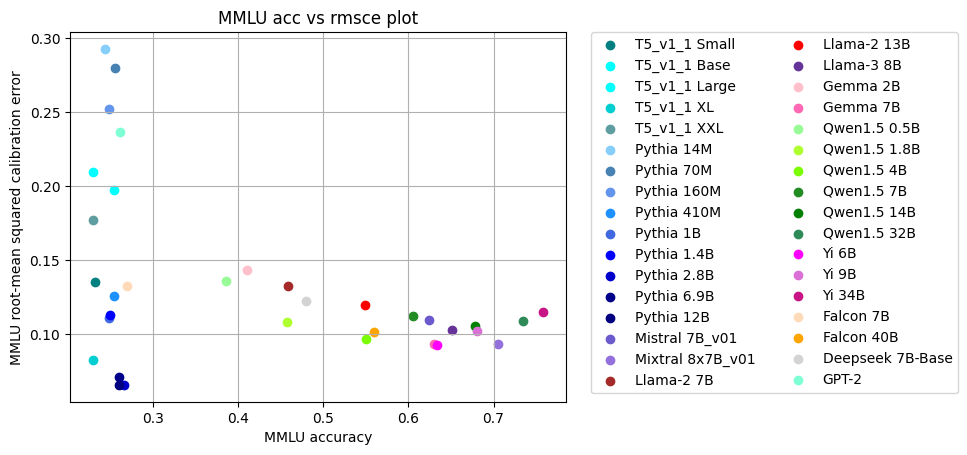

In [32]:
def plot_mmlu_acc_rmsce(models):
	for model in models:
		acc = model[0]
		rmsce = model[1]
		model_name = model[2]
		color = model[3]

		plt.scatter(acc, rmsce, label=model_name, color=color)

	ax.set(ylabel='MMLU root-mean squared calibration error', xlabel='MMLU accuracy', title='MMLU acc vs rmsce plot')
	ax.grid()
	# ax.legend()
	plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=2)

	# fig.savefig("mmlu_acc_vs_rmsce.png")
	plt.show()

acc_rmsce_models = [
	# [np.array(list(flan_t5_small_mmlu[0].values())[0]), np.array(list(flan_t5_small_mmlu[2].values())[0]), "Flan-T5 Small", 'lemonchiff']
	# [np.array(list(flan_t5_base_mmlu[0].values())[0]), np.array(list(flan_t5_base_mmlu[2].values())[0]), "Flan-T5 Base", 'yellow']
	# [np.array(list(flan_t5_large_mmlu[0].values())[0]), np.array(list(flan_t5_large_mmlu[2].values())[0]), "Flan-T5 Large", 'gold']
	# [np.array(list(flan_t5_xl_mmlu[0].values())[0]), np.array(list(flan_t5_xl_mmlu[2].values())[0]), "Flan-T5 XL", 'khaki']
	# [np.array(list(flan_t5_xxl_mmlu[0].values())[0]), np.array(list(flan_t5_xxl_mmlu[2].values())[0]), "Flan-T5 XXL", 'darkhaki']

	[np.array(list(t5_v1_1_small_mmlu[0].values())[0]), np.array(list(t5_v1_1_small_mmlu[2].values())[0]), "T5_v1_1 Small", 'teal'],
	[np.array(list(t5_v1_1_base_mmlu[0].values())[0]), np.array(list(t5_v1_1_base_mmlu[2].values())[0]), "T5_v1_1 Base", 'aqua'],
	[np.array(list(t5_v1_1_large_mmlu[0].values())[0]), np.array(list(t5_v1_1_large_mmlu[2].values())[0]), "T5_v1_1 Large", 'cyan'],
	[np.array(list(t5_v1_1_xl_mmlu[0].values())[0]), np.array(list(t5_v1_1_xl_mmlu[2].values())[0]), "T5_v1_1 XL", 'darkturquoise'],
	[np.array(list(t5_v1_1_xxl_mmlu[0].values())[0]), np.array(list(t5_v1_1_xxl_mmlu[2].values())[0]), "T5_v1_1 XXL", 'cadetblue'],

	[np.array(list(pythia_14m_mmlu[0].values())[0]), np.array(list(pythia_14m_mmlu[2].values())[0]), "Pythia 14M", 'lightskyblue'],
	[np.array(list(pythia_70m_mmlu[0].values())[0]), np.array(list(pythia_70m_mmlu[2].values())[0]), "Pythia 70M", 'steelblue'],
	[np.array(list(pythia_160m_mmlu[0].values())[0]), np.array(list(pythia_160m_mmlu[2].values())[0]), "Pythia 160M", 'cornflowerblue'],
	[np.array(list(pythia_410m_mmlu[0].values())[0]), np.array(list(pythia_410m_mmlu[2].values())[0]), "Pythia 410M", 'dodgerblue'],
	[np.array(list(pythia_1b_mmlu[0].values())[0]), np.array(list(pythia_1b_mmlu[2].values())[0]), "Pythia 1B", 'royalblue'],
	[np.array(list(pythia_1_4b_mmlu[0].values())[0]), np.array(list(pythia_1_4b_mmlu[2].values())[0]), "Pythia 1.4B", 'blue'],
	[np.array(list(pythia_2_8b_mmlu[0].values())[0]), np.array(list(pythia_2_8b_mmlu[2].values())[0]), "Pythia 2.8B", 'mediumblue'],
	[np.array(list(pythia_6_9b_mmlu[0].values())[0]), np.array(list(pythia_6_9b_mmlu[2].values())[0]), "Pythia 6.9B", 'darkblue'],
	[np.array(list(pythia_12b_mmlu[0].values())[0]), np.array(list(pythia_12b_mmlu[2].values())[0]), "Pythia 12B", 'navy'],

	[np.array(list(mistral_7b_v01_mmlu[0].values())[0]), np.array(list(mistral_7b_v01_mmlu[2].values())[0]), "Mistral 7B_v01", 'slateblue'],
	# [np.array(list(mistral_7b_instruct_v02_mmlu[0].values())[0]), np.array(list(mistral_7b_instruct_v02_mmlu[2].values())[0]), "Mistral 7B Instruct_v02", 'mediumslateblue'],
	[np.array(list(mixtral_8x7b_v01_mmlu[0].values())[0]), np.array(list(mixtral_8x7b_v01_mmlu[2].values())[0]), "Mixtral 8x7B_v01", 'mediumpurple'],
	# [np.array(list(mixtral_8x7b_instruct_v01_mmlu[0].values())[0]), np.array(list(mixtral_8x7b_instruct_v01_mmlu[2].values())[0]), "Mixtral 8x7B Instruct_v01", 'blueviolet'],
	# [np.array(list(mixtral_8x22b_v01_mmlu[0].values())[0]), np.array(list(mixtral_8x22b_v01_mmlu[2].values())[0]), "Mixtral 8x22B_v01", 'darkorchid'],
	# [np.array(list(mixtral_8x22b_instruct_v01_mmlu[0].values())[0]), np.array(list(mixtral_8x22b_instruct_v01_mmlu[2].values())[0]), "Mixtral 8x22B Instruct_v01", 'darkviolet'],

	[np.array(list(llama_2_7b_hf_mmlu[0].values())[0]), np.array(list(llama_2_7b_hf_mmlu[2].values())[0]), "Llama-2 7B", 'brown'],
	# [np.array(list(llama_2_7b_chat_hf_mmlu[0].values())[0]), np.array(list(llama_2_7b_chat_hf_mmlu[2].values())[0]), "Llama-2 7B-Chat", 'indianred'],
	[np.array(list(llama_2_13b_hf_mmlu[0].values())[0]), np.array(list(llama_2_13b_hf_mmlu[2].values())[0]), "Llama-2 13B", 'red'],
	# [np.array(list(llama_2_13b_chat_hf_mmlu[0].values())[0]), np.array(list(llama_2_13b_chat_hf_mmlu[2].values())[0]), "Llama-2 13B-Chat", 'orangered'],
	# [np.array(list(llama_2_70b_hf_mmlu[0].values())[0]), np.array(list(llama_2_70b_hf_mmlu[2].values())[0]), "Llama-2 70B", 'tomato'],
	# [np.array(list(llama_2_70b_chat_hf_mmlu[0].values())[0]), np.array(list(llama_2_70b_chat_hf_mmlu[2].values())[0]), "Llama-2 70B-Chat", 'salmon'],

	[np.array(list(meta_llama_3_8B_mmlu[0].values())[0]), np.array(list(meta_llama_3_8B_mmlu[2].values())[0]), "Llama-3 8B", 'rebeccapurple'],
	# [np.array(list(meta_llama_3_8B_instruct_mmlu[0].values())[0]), np.array(list(meta_llama_3_8B_instruct_mmlu[2].values())[0]), "Llama-3 8B-Instruct", 'indigo'],
	# [np.array(list(meta_llama_3_70B_mmlu[0].values())[0]), np.array(list(meta_llama_3_70B_mmlu[2].values())[0]), "Llama-3 70B", 'blueviolet'],
	# [np.array(list(meta_llama_3_70B_instruct_mmlu[0].values())[0]), np.array(list(meta_llama_3_70B_instruct_mmlu[2].values())[0]), "Llama-3 70B-Instruct", 'mediumorchid'],

	[np.array(list(gemma_2b_mmlu[0].values())[0]), np.array(list(gemma_2b_mmlu[2].values())[0]), "Gemma 2B", 'pink'],
	# [np.array(list(gemma_1_1_2b_it_mmlu[0].values())[0]), np.array(list(gemma_1_1_2b_it_mmlu[2].values())[0]), "Gemma_1_1 2B-it", 'crimson'],
	[np.array(list(gemma_7b_mmlu[0].values())[0]), np.array(list(gemma_7b_mmlu[2].values())[0]), "Gemma 7B", 'hotpink'],
	# [np.array(list(gemma_1_1_7b_it_mmlu[0].values())[0]), np.array(list(gemma_1_1_7b_it_mmlu[2].values())[0]), "Gemma_1_1 7B-it", 'lightpink'],

	[np.array(list(qwen1_5_0_5B_mmlu[0].values())[0]), np.array(list(qwen1_5_0_5B_mmlu[2].values())[0]), "Qwen1.5 0.5B", 'palegreen'],
	# [np.array(list(qwen1_5_0_5B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_0_5B_chat_mmlu[2].values())[0]), "Qwen1.5 0.5B-Chat", 'lightgreen'],
	[np.array(list(qwen1_5_1_8B_mmlu[0].values())[0]), np.array(list(qwen1_5_1_8B_mmlu[2].values())[0]), "Qwen1.5 1.8B", 'greenyellow'],
	# [np.array(list(qwen1_5_1_8B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_1_8B_chat_mmlu[2].values())[0]), "Qwen1.5 1.8B-Chat", 'charteuse'],
	[np.array(list(qwen1_5_4B_mmlu[0].values())[0]), np.array(list(qwen1_5_4B_mmlu[2].values())[0]), "Qwen1.5 4B", 'lawngreen'],
	# [np.array(list(qwen1_5_4B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_4B_chat_mmlu[2].values())[0]), "Qwen1.5 4B-Chat", 'lime'],
	[np.array(list(qwen1_5_7B_mmlu[0].values())[0]), np.array(list(qwen1_5_7B_mmlu[2].values())[0]), "Qwen1.5 7B", 'forestgreen'],
	# [np.array(list(qwen1_5_7B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_7B_chat_mmlu[2].values())[0]), "Qwen1.5 7B-Chat", 'limegreen'],
	[np.array(list(qwen1_5_14B_mmlu[0].values())[0]), np.array(list(qwen1_5_14B_mmlu[2].values())[0]), "Qwen1.5 14B", 'green'],
	# [np.array(list(qwen1_5_14B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_14B_chat_mmlu[2].values())[0]), "Qwen1.5 14B-Chat", 'mediumseagreen'],
	[np.array(list(qwen1_5_32B_mmlu[0].values())[0]), np.array(list(qwen1_5_32B_mmlu[2].values())[0]), "Qwen1.5 32B", 'seagreen'],
	# [np.array(list(qwen1_5_32B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_32B_chat_mmlu[2].values())[0]), "Qwen1.5 32B-Chats", 'springgreen'],
	# [np.array(list(qwen1_5_72B_mmlu[0].values())[0]), np.array(list(qwen1_5_72B_mmlu[2].values())[0]), "Qwen1.5 72B", 'olivedrab'],
	# [np.array(list(qwen1_5_72B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_72B_chat_mmlu[2].values())[0]), "Qwen1.5 72B-Chats", 'darkgreen'],
	# [np.array(list(qwen1_5_110B_mmlu[0].values())[0]), np.array(list(qwen1_5_110B_mmlu[2].values())[0]), "Qwen1.5 110B", 'olive'],
	# [np.array(list(qwen1_5_110B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_110B_chat_mmlu[2].values())[0]), "Qwen1.5 110B-Chats", 'darkolivegreen'],

	[np.array(list(yi_6B_mmlu[0].values())[0]), np.array(list(yi_6B_mmlu[2].values())[0]), "Yi 6B", 'fuchsia'],
	# [np.array(list(yi_6B_chat_mmlu[0].values())[0]), np.array(list(yi_6B_chat_mmlu[2].values())[0]), "Yi 6B-Chat", 'magenta'],
	[np.array(list(yi_9B_mmlu[0].values())[0]), np.array(list(yi_9B_mmlu[2].values())[0]), "Yi 9B", 'orchid'],
	[np.array(list(yi_34B_mmlu[0].values())[0]), np.array(list(yi_34B_mmlu[2].values())[0]), "Yi 34B", 'mediumvioletred'],
	# [np.array(list(yi_34B_chat_mmlu[0].values())[0]), np.array(list(yi_34 B_chat_mmlu[2].values())[0]), "Yi 34B-Chat", 'deeppink'],

	[np.array(list(falcon_7b_mmlu[0].values())[0]), np.array(list(falcon_7b_mmlu[2].values())[0]), "Falcon 7B", 'peachpuff'],
	# [np.array(list(falcon_7b_instruct_mmlu[0].values())[0]), np.array(list(falcon_7b_instruct_mmlu[2].values())[0]), "Falcon 7B-Instruct", 'sandybrown'],
	[np.array(list(falcon_40b_mmlu[0].values())[0]), np.array(list(falcon_40b_mmlu[2].values())[0]), "Falcon 40B", 'orange'],
	# [np.array(list(falcon_40b_instruct_mmlu[0].values())[0]), np.array(list(falcon_40b_instruct_mmlu[2].values())[0]), "Falcon 40B-Instruct", 'darkorange'],
	# [np.array(list(falcon_180b_mmlu[0].values())[0]), np.array(list(falcon_180b_mmlu[2].values())[0]), "Falcon 180B", 'lightsalmon'],
	# [np.array(list(falcon_180b_instruct_mmlu[0].values())[0]), np.array(list(falcon_180b_instruct_mmlu[2].values())[0]), "Falcon 180B-Instruct", 'bisque'],

	[np.array(list(deepseek_7b_base_mmlu[0].values())[0]), np.array(list(deepseek_7b_base_mmlu[2].values())[0]), "Deepseek 7B-Base", 'lightgray'],
	# [np.array(list(deepseek_7b_chat_mmlu[0].values())[0]), np.array(list(deepseek_7b_chat_mmlu[2].values())[0]), "Deepseek 7B-Chat", 'darkgrey'],
	# [np.array(list(deepseek_67b_base_mmlu[0].values())[0]), np.array(list(deepseek_67b_base_mmlu[2].values())[0]), "Deepseek 67B-Base", 'gray'],
	# [np.array(list(deepseek_67b_chat_mmlu[0].values())[0]), np.array(list(deepseek_67b_chat_mmlu[2].values())[0]), "Deepseek 67B-Chat", 'black'],

	[np.array(list(gpt_2_mmlu[0].values())[0]), np.array(list(gpt_2_mmlu[2].values())[0]), "GPT-2", 'aquamarine']
]

fig, ax = plt.subplots()
plot_mmlu_acc_rmsce(acc_rmsce_models)

#### MMLU plot for acc vs brier_score

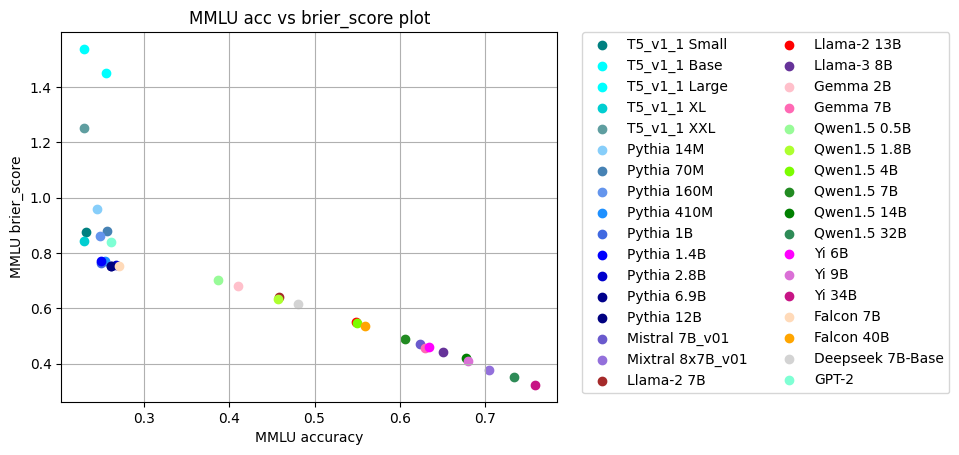

In [29]:
def plot_mmlu_acc_rmsce(models):
	for model in models:
		acc = model[0]
		rmsce = model[1]
		model_name = model[2]
		color = model[3]

		plt.scatter(acc, rmsce, label=model_name, color=color)

	ax.set(ylabel='MMLU brier_score', xlabel='MMLU accuracy', title='MMLU acc vs brier_score plot')
	ax.grid()
	# ax.legend()
	plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=2)

	# fig.savefig("mmlu_acc_vs_brier_score.png")
	plt.show()

acc_brier_models = [
	# [np.array(list(flan_t5_small_mmlu[0].values())[0]), np.array(list(flan_t5_small_mmlu[1].values())[0]), "Flan-T5 Small", 'lemonchiff']
	# [np.array(list(flan_t5_base_mmlu[0].values())[0]), np.array(list(flan_t5_base_mmlu[1].values())[0]), "Flan-T5 Base", 'yellow']
	# [np.array(list(flan_t5_large_mmlu[0].values())[0]), np.array(list(flan_t5_large_mmlu[1].values())[0]), "Flan-T5 Large", 'gold']
	# [np.array(list(flan_t5_xl_mmlu[0].values())[0]), np.array(list(flan_t5_xl_mmlu[1].values())[0]), "Flan-T5 XL", 'khaki']
	# [np.array(list(flan_t5_xxl_mmlu[0].values())[0]), np.array(list(flan_t5_xxl_mmlu[1].values())[0]), "Flan-T5 XXL", 'darkhaki']

	[np.array(list(t5_v1_1_small_mmlu[0].values())[0]), np.array(list(t5_v1_1_small_mmlu[1].values())[0]), "T5_v1_1 Small", 'teal'],
	[np.array(list(t5_v1_1_base_mmlu[0].values())[0]), np.array(list(t5_v1_1_base_mmlu[1].values())[0]), "T5_v1_1 Base", 'aqua'],
	[np.array(list(t5_v1_1_large_mmlu[0].values())[0]), np.array(list(t5_v1_1_large_mmlu[1].values())[0]), "T5_v1_1 Large", 'cyan'],
	[np.array(list(t5_v1_1_xl_mmlu[0].values())[0]), np.array(list(t5_v1_1_xl_mmlu[1].values())[0]), "T5_v1_1 XL", 'darkturquoise'],
	[np.array(list(t5_v1_1_xxl_mmlu[0].values())[0]), np.array(list(t5_v1_1_xxl_mmlu[1].values())[0]), "T5_v1_1 XXL", 'cadetblue'],

	[np.array(list(pythia_14m_mmlu[0].values())[0]), np.array(list(pythia_14m_mmlu[1].values())[0]), "Pythia 14M", 'lightskyblue'],
	[np.array(list(pythia_70m_mmlu[0].values())[0]), np.array(list(pythia_70m_mmlu[1].values())[0]), "Pythia 70M", 'steelblue'],
	[np.array(list(pythia_160m_mmlu[0].values())[0]), np.array(list(pythia_160m_mmlu[1].values())[0]), "Pythia 160M", 'cornflowerblue'],
	[np.array(list(pythia_410m_mmlu[0].values())[0]), np.array(list(pythia_410m_mmlu[1].values())[0]), "Pythia 410M", 'dodgerblue'],
	[np.array(list(pythia_1b_mmlu[0].values())[0]), np.array(list(pythia_1b_mmlu[1].values())[0]), "Pythia 1B", 'royalblue'],
	[np.array(list(pythia_1_4b_mmlu[0].values())[0]), np.array(list(pythia_1_4b_mmlu[1].values())[0]), "Pythia 1.4B", 'blue'],
	[np.array(list(pythia_2_8b_mmlu[0].values())[0]), np.array(list(pythia_2_8b_mmlu[1].values())[0]), "Pythia 2.8B", 'mediumblue'],
	[np.array(list(pythia_6_9b_mmlu[0].values())[0]), np.array(list(pythia_6_9b_mmlu[1].values())[0]), "Pythia 6.9B", 'darkblue'],
	[np.array(list(pythia_12b_mmlu[0].values())[0]), np.array(list(pythia_12b_mmlu[1].values())[0]), "Pythia 12B", 'navy'],

	[np.array(list(mistral_7b_v01_mmlu[0].values())[0]), np.array(list(mistral_7b_v01_mmlu[1].values())[0]), "Mistral 7B_v01", 'slateblue'],
	# [np.array(list(mistral_7b_instruct_v02_mmlu[0].values())[0]), np.array(list(mistral_7b_instruct_v02_mmlu[1].values())[0]), "Mistral 7B Instruct_v02", 'mediumslateblue'],
	[np.array(list(mixtral_8x7b_v01_mmlu[0].values())[0]), np.array(list(mixtral_8x7b_v01_mmlu[1].values())[0]), "Mixtral 8x7B_v01", 'mediumpurple'],
	# [np.array(list(mixtral_8x7b_instruct_v01_mmlu[0].values())[0]), np.array(list(mixtral_8x7b_instruct_v01_mmlu[1].values())[0]), "Mixtral 8x7B Instruct_v01", 'blueviolet'],
	# [np.array(list(mixtral_8x22b_v01_mmlu[0].values())[0]), np.array(list(mixtral_8x22b_v01_mmlu[1].values())[0]), "Mixtral 8x22B_v01", 'darkorchid'],
	# [np.array(list(mixtral_8x22b_instruct_v01_mmlu[0].values())[0]), np.array(list(mixtral_8x22b_instruct_v01_mmlu[1].values())[0]), "Mixtral 8x22B Instruct_v01", 'darkviolet'],

	[np.array(list(llama_2_7b_hf_mmlu[0].values())[0]), np.array(list(llama_2_7b_hf_mmlu[1].values())[0]), "Llama-2 7B", 'brown'],
	# [np.array(list(llama_2_7b_chat_hf_mmlu[0].values())[0]), np.array(list(llama_2_7b_chat_hf_mmlu[1].values())[0]), "Llama-2 7B-Chat", 'indianred'],
	[np.array(list(llama_2_13b_hf_mmlu[0].values())[0]), np.array(list(llama_2_13b_hf_mmlu[1].values())[0]), "Llama-2 13B", 'red'],
	# [np.array(list(llama_2_13b_chat_hf_mmlu[0].values())[0]), np.array(list(llama_2_13b_chat_hf_mmlu[1].values())[0]), "Llama-2 13B-Chat", 'orangered'],
	# [np.array(list(llama_2_70b_hf_mmlu[0].values())[0]), np.array(list(llama_2_70b_hf_mmlu[1].values())[0]), "Llama-2 70B", 'tomato'],
	# [np.array(list(llama_2_70b_chat_hf_mmlu[0].values())[0]), np.array(list(llama_2_70b_chat_hf_mmlu[1].values())[0]), "Llama-2 70B-Chat", 'salmon'],

	[np.array(list(meta_llama_3_8B_mmlu[0].values())[0]), np.array(list(meta_llama_3_8B_mmlu[1].values())[0]), "Llama-3 8B", 'rebeccapurple'],
	# [np.array(list(meta_llama_3_8B_instruct_mmlu[0].values())[0]), np.array(list(meta_llama_3_8B_instruct_mmlu[1].values())[0]), "Llama-3 8B-Instruct", 'indigo'],
	# [np.array(list(meta_llama_3_70B_mmlu[0].values())[0]), np.array(list(meta_llama_3_70B_mmlu[1].values())[0]), "Llama-3 70B", 'blueviolet'],
	# [np.array(list(meta_llama_3_70B_instruct_mmlu[0].values())[0]), np.array(list(meta_llama_3_70B_instruct_mmlu[1].values())[0]), "Llama-3 70B-Instruct", 'mediumorchid'],

	[np.array(list(gemma_2b_mmlu[0].values())[0]), np.array(list(gemma_2b_mmlu[1].values())[0]), "Gemma 2B", 'pink'],
	# [np.array(list(gemma_1_1_2b_it_mmlu[0].values())[0]), np.array(list(gemma_1_1_2b_it_mmlu[1].values())[0]), "Gemma_1_1 2B-it", 'crimson'],
	[np.array(list(gemma_7b_mmlu[0].values())[0]), np.array(list(gemma_7b_mmlu[1].values())[0]), "Gemma 7B", 'hotpink'],
	# [np.array(list(gemma_1_1_7b_it_mmlu[0].values())[0]), np.array(list(gemma_1_1_7b_it_mmlu[1].values())[0]), "Gemma_1_1 7B-it", 'lightpink'],

	[np.array(list(qwen1_5_0_5B_mmlu[0].values())[0]), np.array(list(qwen1_5_0_5B_mmlu[1].values())[0]), "Qwen1.5 0.5B", 'palegreen'],
	# [np.array(list(qwen1_5_0_5B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_0_5B_chat_mmlu[1].values())[0]), "Qwen1.5 0.5B-Chat", 'lightgreen'],
	[np.array(list(qwen1_5_1_8B_mmlu[0].values())[0]), np.array(list(qwen1_5_1_8B_mmlu[1].values())[0]), "Qwen1.5 1.8B", 'greenyellow'],
	# [np.array(list(qwen1_5_1_8B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_1_8B_chat_mmlu[1].values())[0]), "Qwen1.5 1.8B-Chat", 'charteuse'],
	[np.array(list(qwen1_5_4B_mmlu[0].values())[0]), np.array(list(qwen1_5_4B_mmlu[1].values())[0]), "Qwen1.5 4B", 'lawngreen'],
	# [np.array(list(qwen1_5_4B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_4B_chat_mmlu[1].values())[0]), "Qwen1.5 4B-Chat", 'lime'],
	[np.array(list(qwen1_5_7B_mmlu[0].values())[0]), np.array(list(qwen1_5_7B_mmlu[1].values())[0]), "Qwen1.5 7B", 'forestgreen'],
	# [np.array(list(qwen1_5_7B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_7B_chat_mmlu[1].values())[0]), "Qwen1.5 7B-Chat", 'limegreen'],
	[np.array(list(qwen1_5_14B_mmlu[0].values())[0]), np.array(list(qwen1_5_14B_mmlu[1].values())[0]), "Qwen1.5 14B", 'green'],
	# [np.array(list(qwen1_5_14B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_14B_chat_mmlu[1].values())[0]), "Qwen1.5 14B-Chat", 'mediumseagreen'],
	[np.array(list(qwen1_5_32B_mmlu[0].values())[0]), np.array(list(qwen1_5_32B_mmlu[1].values())[0]), "Qwen1.5 32B", 'seagreen'],
	# [np.array(list(qwen1_5_32B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_32B_chat_mmlu[1].values())[0]), "Qwen1.5 32B-Chats", 'springgreen'],
	# [np.array(list(qwen1_5_72B_mmlu[0].values())[0]), np.array(list(qwen1_5_72B_mmlu[1].values())[0]), "Qwen1.5 72B", 'olivedrab'],
	# [np.array(list(qwen1_5_72B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_72B_chat_mmlu[1].values())[0]), "Qwen1.5 72B-Chats", 'darkgreen'],
	# [np.array(list(qwen1_5_110B_mmlu[0].values())[0]), np.array(list(qwen1_5_110B_mmlu[1].values())[0]), "Qwen1.5 110B", 'olive'],
	# [np.array(list(qwen1_5_110B_chat_mmlu[0].values())[0]), np.array(list(qwen1_5_110B_chat_mmlu[1].values())[0]), "Qwen1.5 110B-Chats", 'darkolivegreen'],

	[np.array(list(yi_6B_mmlu[0].values())[0]), np.array(list(yi_6B_mmlu[1].values())[0]), "Yi 6B", 'fuchsia'],
	# [np.array(list(yi_6B_chat_mmlu[0].values())[0]), np.array(list(yi_6B_chat_mmlu[1].values())[0]), "Yi 6B-Chat", 'magenta'],
	[np.array(list(yi_9B_mmlu[0].values())[0]), np.array(list(yi_9B_mmlu[1].values())[0]), "Yi 9B", 'orchid'],
	[np.array(list(yi_34B_mmlu[0].values())[0]), np.array(list(yi_34B_mmlu[1].values())[0]), "Yi 34B", 'mediumvioletred'],
	# [np.array(list(yi_34B_chat_mmlu[0].values())[0]), np.array(list(yi_34 B_chat_mmlu[1].values())[0]), "Yi 34B-Chat", 'deeppink'],

	[np.array(list(falcon_7b_mmlu[0].values())[0]), np.array(list(falcon_7b_mmlu[1].values())[0]), "Falcon 7B", 'peachpuff'],
	# [np.array(list(falcon_7b_instruct_mmlu[0].values())[0]), np.array(list(falcon_7b_instruct_mmlu[1].values())[0]), "Falcon 7B-Instruct", 'sandybrown'],
	[np.array(list(falcon_40b_mmlu[0].values())[0]), np.array(list(falcon_40b_mmlu[1].values())[0]), "Falcon 40B", 'orange'],
	# [np.array(list(falcon_40b_instruct_mmlu[0].values())[0]), np.array(list(falcon_40b_instruct_mmlu[1].values())[0]), "Falcon 40B-Instruct", 'darkorange'],
	# [np.array(list(falcon_180b_mmlu[0].values())[0]), np.array(list(falcon_180b_mmlu[1].values())[0]), "Falcon 180B", 'lightsalmon'],
	# [np.array(list(falcon_180b_instruct_mmlu[0].values())[0]), np.array(list(falcon_180b_instruct_mmlu[1].values())[0]), "Falcon 180B-Instruct", 'bisque'],

	[np.array(list(deepseek_7b_base_mmlu[0].values())[0]), np.array(list(deepseek_7b_base_mmlu[1].values())[0]), "Deepseek 7B-Base", 'lightgray'],
	# [np.array(list(deepseek_7b_chat_mmlu[0].values())[0]), np.array(list(deepseek_7b_chat_mmlu[1].values())[0]), "Deepseek 7B-Chat", 'darkgrey'],
	# [np.array(list(deepseek_67b_base_mmlu[0].values())[0]), np.array(list(deepseek_67b_base_mmlu[1].values())[0]), "Deepseek 67B-Base", 'gray'],
	# [np.array(list(deepseek_67b_chat_mmlu[0].values())[0]), np.array(list(deepseek_67b_chat_mmlu[1].values())[0]), "Deepseek 67B-Chat", 'black'],

	[np.array(list(gpt_2_mmlu[0].values())[0]), np.array(list(gpt_2_mmlu[1].values())[0]), "GPT-2", 'aquamarine']
]

fig, ax = plt.subplots()
plot_mmlu_acc_rmsce(acc_brier_models)

### Pickle for all model results

In [33]:
# create dataframe for all models mmlu accuracy, brier_score, rmsce 
# save as pickle for Richard

acc_values = [model[0] for model in acc_rmsce_models]
brier_values = [model[1] for model in acc_brier_models]
rmsce_values = [model[1] for model in acc_rmsce_models]
model_name = [model[2] for model in acc_rmsce_models]

# Create DataFrame
df = pd.DataFrame({"MMLU accuracy": acc_values, "MMLU brier_score": brier_values, "MMLU rmsce": rmsce_values}, index=model_name)
df.to_pickle('/data/ryan_k/safety_vs_capabilities/pickled_results/acc_brier_rmsce_results.pkl')

df


,MMLU accuracy,MMLU brier_score,MMLU rmsce
T5_v1_1 Small,0.2318758011679248,0.8752761293684251,0.13502654389694285
T5_v1_1 Base,0.25509186725537675,1.4504106908943244,0.19722047040836507
T5_v1_1 Large,0.22945449366187154,1.5386045911584412,0.20938977854275784
T5_v1_1 XL,0.22945449366187154,0.8433651931978258,0.08235747811316263
T5_v1_1 XXL,0.22945449366187154,1.2519179324763696,0.17745978883656166
Pythia 14M,0.244195983478137,0.957548898504293,0.2929259576533113
Pythia 70M,0.25630252100840334,0.8779677532340434,0.2797979596786977
Pythia 160M,0.24875373878364906,0.8611690652354206,0.2521134921144335
Pythia 410M,0.2545933627688364,0.7713938222834545,0.126053967242832
Pythia 1B,0.24910981341689217,0.7656234758100302,0.11114636904766408
